In [1]:
import scanpy as sc
import os
import numpy as np
import pandas as pd
import sys
import matplotlib.pyplot as plt

In [2]:
output_folder = r'../../outputs'
ad_sp = sc.read(os.path.join(output_folder, 'adatas', 'combined_spatial_seurat.h5ad'))

In [4]:
figure_output_folder =  'figures'
try:
    os.mkdir(figure_output_folder)
except:
    pass

In [5]:
unique_batches = np.unique(ad_sp.obs.batch.values)
new_batch_names = pd.DataFrame(zip(unique_batches, ['AvrRpt2 04hr', 'AvrRpt2 06hr', 'AvrRpt2 09hr', 'AvrRpt2 24hr', 'Mock']))
n_batches = []
for i in ad_sp.obs.batch.values:
    n_batches.append(new_batch_names[1].values[new_batch_names[0] == i][0])
ad_sp.obs['batch'] = pd.Categorical(n_batches)
unique_batches = np.unique(ad_sp.obs.batch.values)

In [6]:
ad_sp.obs['batch'] = ad_sp.obs.batch.cat.reorder_categories(['Mock', 'AvrRpt2 04hr', 'AvrRpt2 06hr', 'AvrRpt2 09hr', 'AvrRpt2 24hr'], ordered=True)

In [7]:
sc.set_figure_params(dpi=300, dpi_save=400)

## Transcripts per Cell

/tmp/ipykernel_1171503/1686864558.py:8: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  plt.tight_layout()


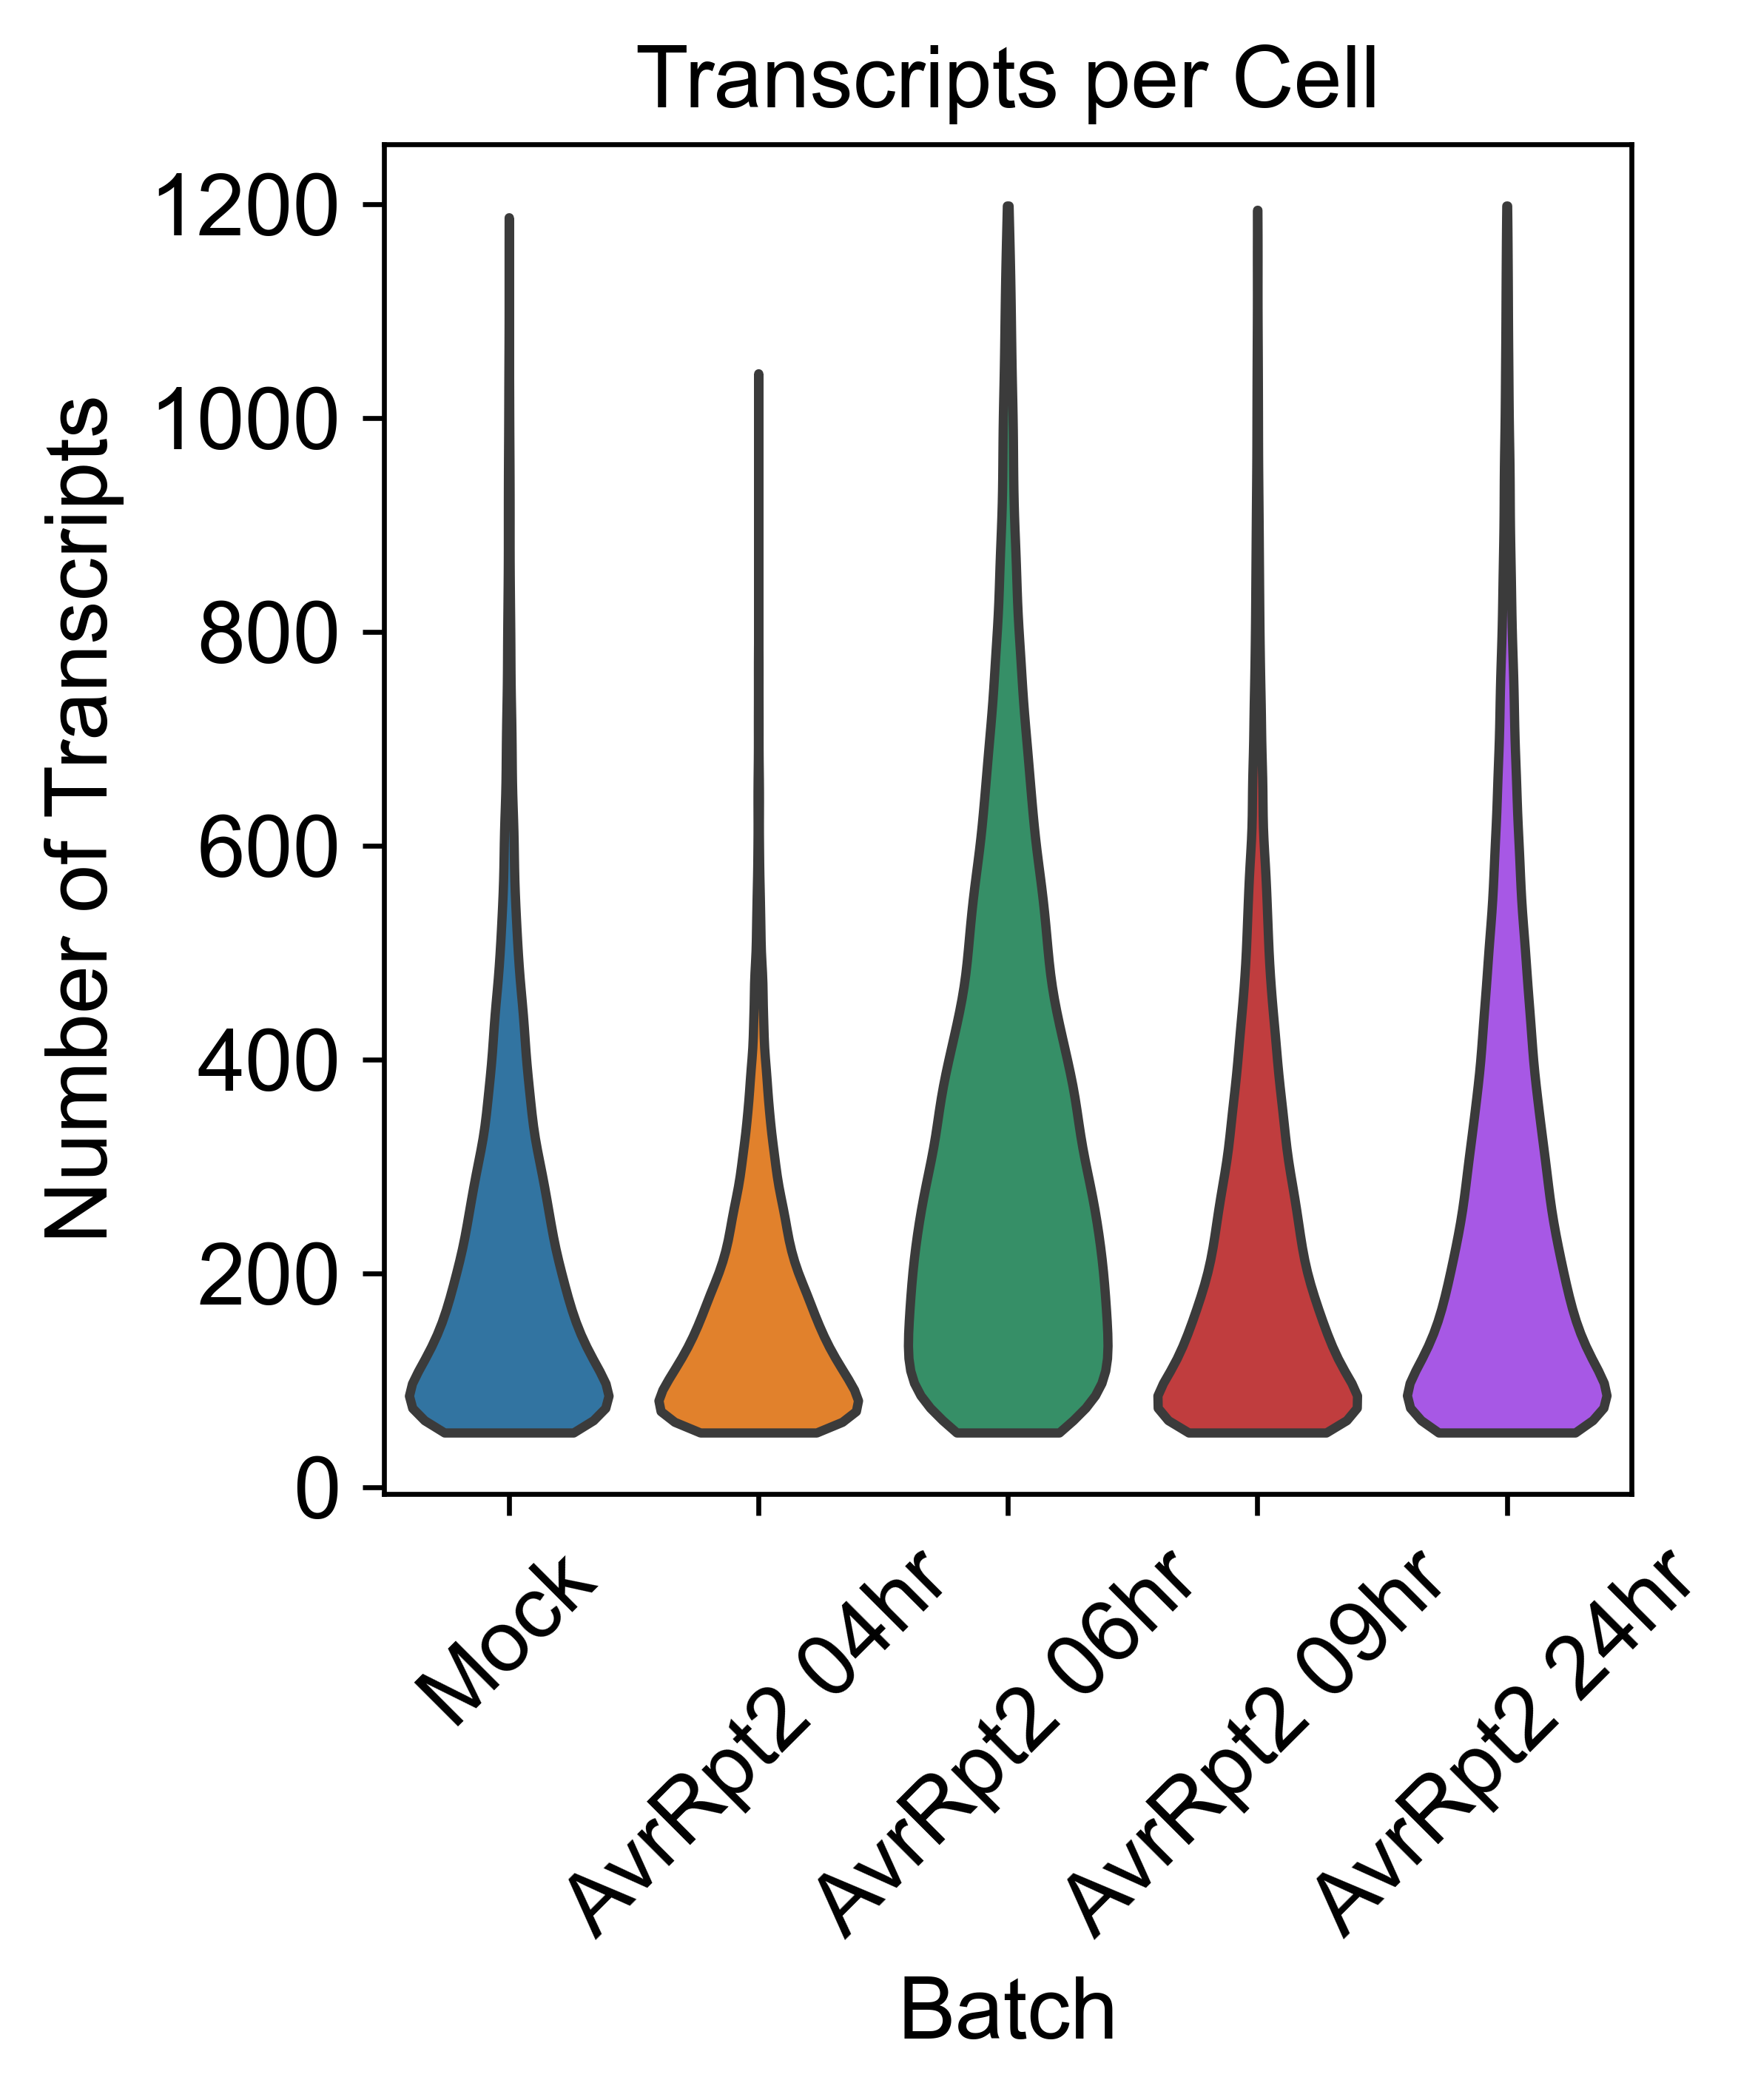

In [8]:
ax = sc.pl.violin(ad_sp, groupby='batch', keys=['n_transcripts'], size=0.1, ylabel='Number of Transcripts', xlabel='Batch', show=False, stripplot=False)
ax.set_title('Transcripts per Cell')
ax.grid(False)
# Rotate the x-axis tick labels by 45 degrees
ax.set_xticklabels(ax.get_xticklabels(), rotation=45)

# Optionally, adjust the subplot layout to prevent clipping of labels
plt.tight_layout()
plt.savefig(os.path.join(figure_output_folder, 'NumTranscripts.pdf'))
plt.show()

## Cell Area

/tmp/ipykernel_1171503/4055885162.py:8: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  plt.tight_layout()


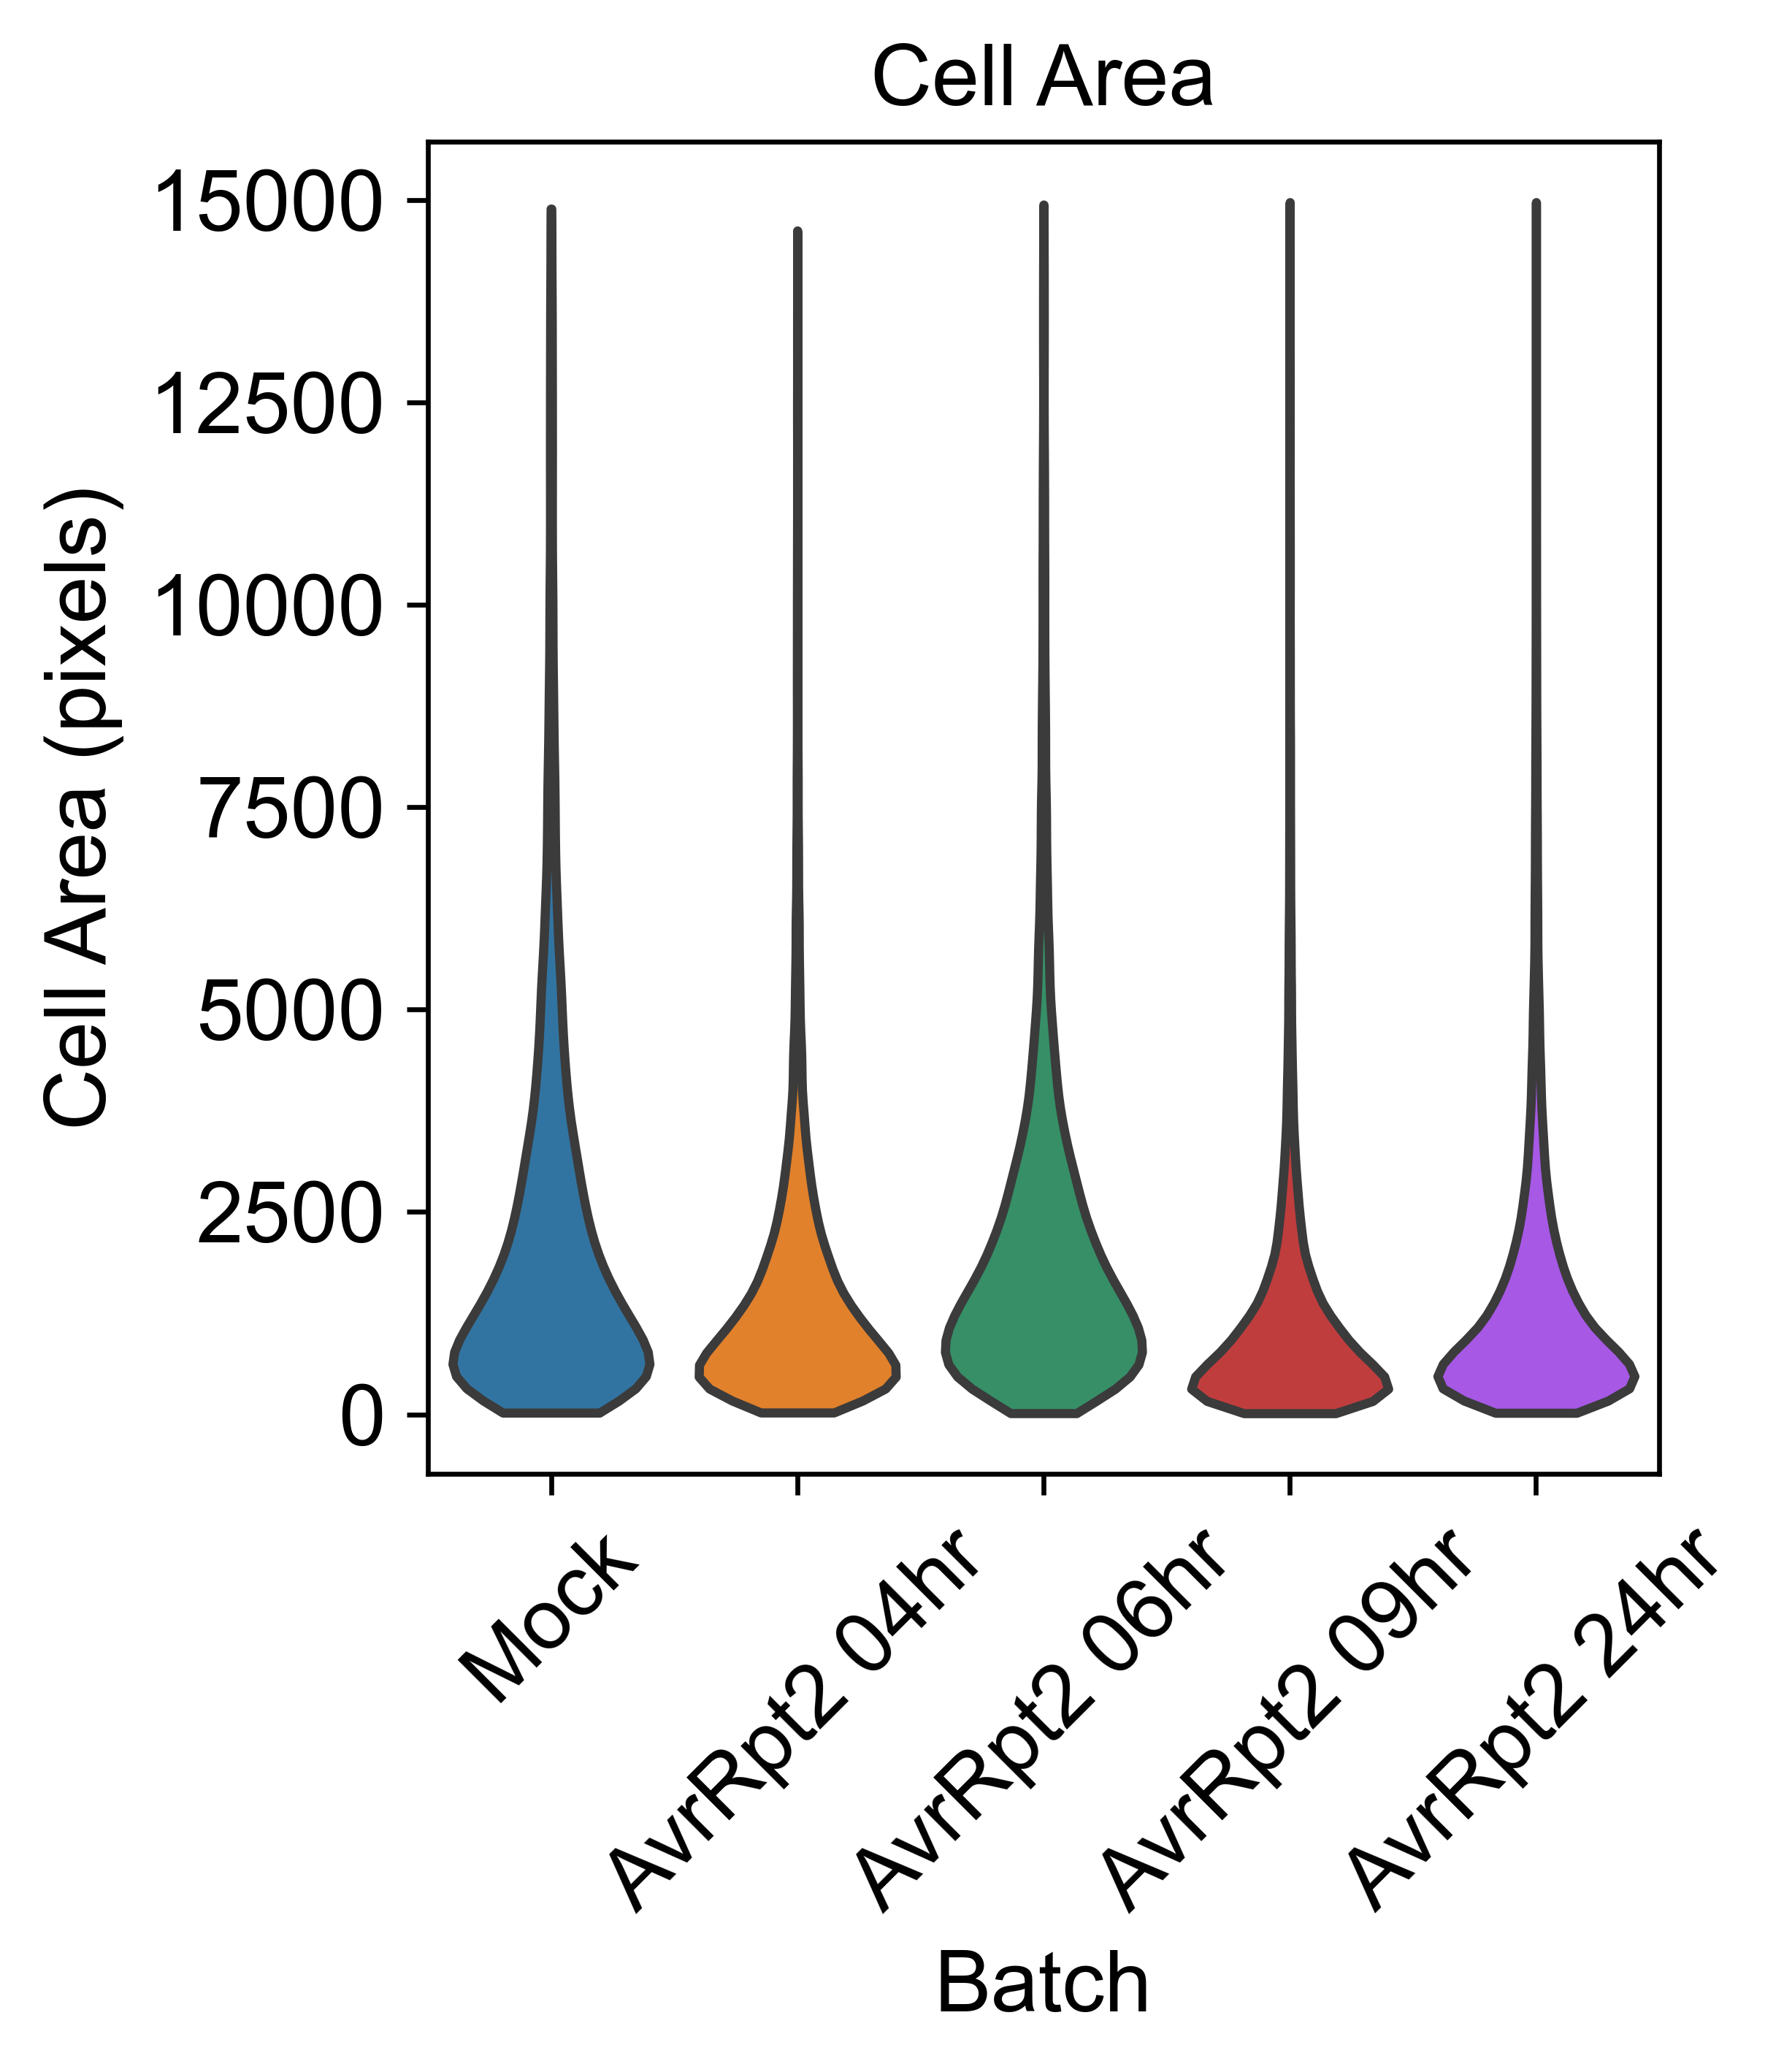

In [9]:
ax = sc.pl.violin(ad_sp, groupby='batch', keys=['area'], size=0.1, ylabel='Cell Area (pixels)', xlabel='Batch', show=False, stripplot=False)
ax.set_title('Cell Area')
ax.grid(False)
# Rotate the x-axis tick labels by 45 degrees
ax.set_xticklabels(ax.get_xticklabels(), rotation=45)

# Optionally, adjust the subplot layout to prevent clipping of labels
plt.tight_layout()
plt.savefig(os.path.join(figure_output_folder, 'CellArea.pdf'))
plt.show()

## Unique Genes Per Cell

In [10]:
uniq_per_cell = np.unique(np.where(ad_sp.layers['counts'].A > 0)[0], return_counts=True)

In [11]:
ad_sp.obs['Unique Genes per Cell'] = uniq_per_cell[1]

/tmp/ipykernel_1171503/4041631206.py:8: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  plt.tight_layout()


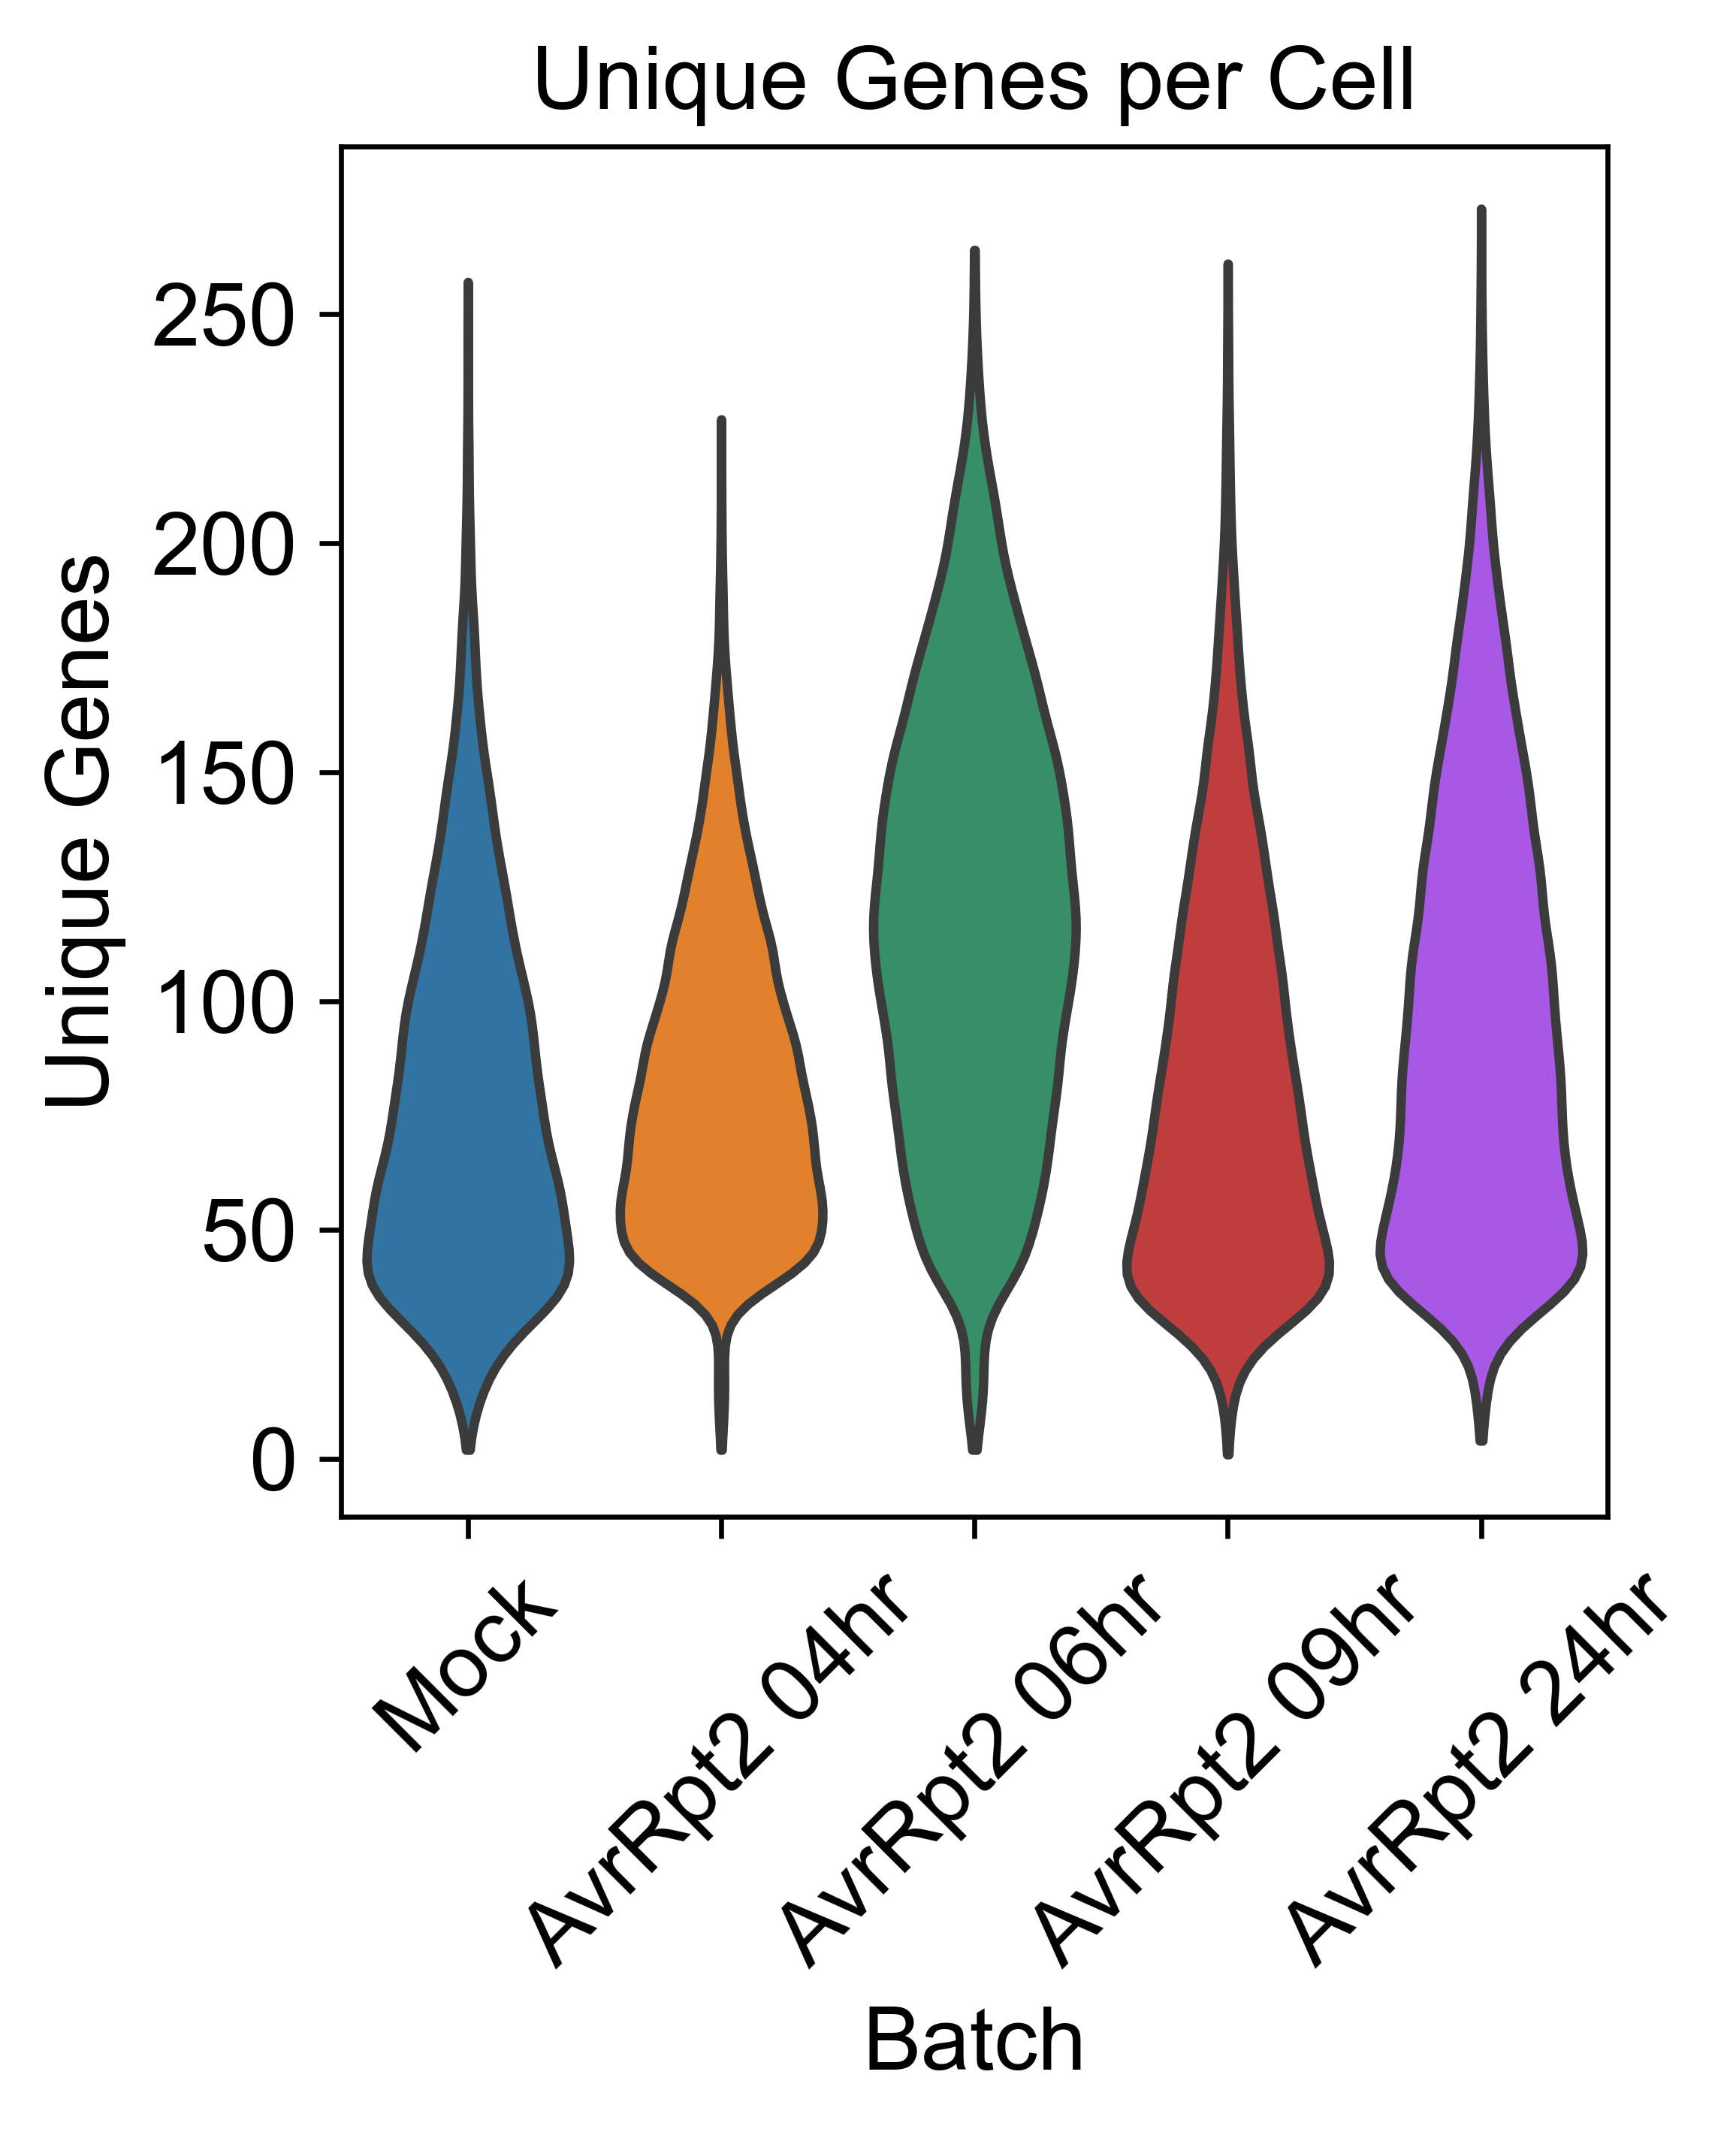

In [12]:
ax = sc.pl.violin(ad_sp, groupby='batch', keys=['Unique Genes per Cell'], size=0.1, ylabel='Unique Genes', xlabel='Batch', show=False, stripplot=False)
ax.set_title('Unique Genes per Cell')
ax.grid(False)
# Rotate the x-axis tick labels by 45 degrees
ax.set_xticklabels(ax.get_xticklabels(), rotation=45)

# Optionally, adjust the subplot layout to prevent clipping of labels
plt.tight_layout()
plt.savefig(os.path.join(figure_output_folder, 'UniquePerCell.pdf'))
plt.show()